<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_1_covid19_TS/Visualizing_Time_Series_Dataset_COVID_19_Data_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

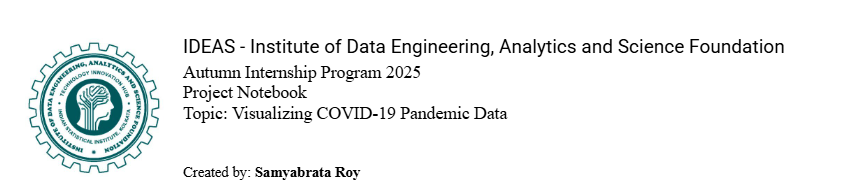

# Notebook: 1

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---



##📖 Introduction

When the COVID-19 pandemic began, the world was flooded with numbers — daily cases, recoveries, deaths, and later vaccinations. Looking at endless tables of figures wasn’t just boring, it was confusing.

But the moment those numbers were drawn into curves, bars, and maps, they started to make sense. Suddenly, we could see when cases were rising, where outbreaks were spreading, and how vaccinations were helping. The data wasn’t just numbers anymore — it was a story of how the world was coping.

That’s the real power of visualization. It’s not about making charts look pretty — it’s about making data human, so that anyone, not just experts, can understand what’s happening.

In this notebook, we’ll take COVID-19 data and learn step by step how to explore and visualize it using Python. Some of the code will be ready for you, while some parts will be left for you to try on your own. By the end, you’ll see how visualization can transform raw data into meaningful insights — and how those insights help us understand events that shape our lives.



---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily COVID-19 cases.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1Sj3Il94NXun9owedSWNGrxszjpAXTDEQ"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_covid = pd.read_csv(url)

  # Show first few rows
  print(df_covid.head())
except Exception as e:
    print(f"Error loading data: {e}")

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date_reported**
- **Country**
- **WHO_region**
- **New_cases**
- **New_deaths**
- **Cumulative_cases**
- **Cumulative_deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [ ]:
# Subsetting the dataset for analysis
subset_cols = [
    "Date_reported",
    "Country",
    "WHO_region",
    "New_cases",
    "New_deaths",
    "Cumulative_cases",
    "Cumulative_deaths"
]

df_covid_subset = df_covid[subset_cols].copy()

### Date Trimming  

Since our dataset contains records over a wide range of dates, we may not always need the full timeline for analysis.  
To make the dataset more relevant and manageable, we will **filter the data based on a specific date range**.  

This allows us to:  
- Focus on a particular period of interest (e.g., second wave, third wave, or vaccination drive).  
- Reduce noise from irrelevant dates.  
- Improve the clarity of visualizations by narrowing down to meaningful time windows.  

By trimming the data to the required start and end dates, we ensure that our analysis stays **targeted and insightful**.  

#### Here start date is chosen as 1st of Mar 2020 & end date is choosen as 31st of Aug 2023 as according to WHO, they stopped requiring daily basis data reporting since August 2023

In [ ]:
# Assuming your dataframe is named df and Date_reported is already in datetime format
df_covid_subset['Date_reported'] = pd.to_datetime(df_covid_subset['Date_reported'])

# Define the date range
start_date = "2020-03-01"
end_date = "2023-08-31"

# Filter the rows
df_covid_trimmed = df_covid_subset[(df_covid_subset['Date_reported'] >= start_date) & (df_covid_subset['Date_reported'] <= end_date)]

# Check subset
print("Subset shape:", df_covid_trimmed.shape)
print(df_covid_trimmed.head())
print(df_covid_trimmed.tail())

Subset shape: (306960, 7)
      Date_reported  Country WHO_region  New_cases  New_deaths  \
13680    2020-03-01    Yemen        EMR        NaN         NaN   
13681    2020-03-01  Uruguay        AMR        NaN         NaN   
13682    2020-03-01  Ukraine        EUR        NaN         NaN   
13683    2020-03-01  Tunisia        EMR        NaN         NaN   
13684    2020-03-01    Sudan        EMR        NaN         NaN   

       Cumulative_cases  Cumulative_deaths  
13680                 0                  0  
13681                 0                  0  
13682                 0                  0  
13683                 0                  0  
13684                 0                  0  
       Date_reported                           Country WHO_region  New_cases  \
320635    2023-08-31                        Tajikistan        EUR        NaN   
320636    2023-08-31                         Sri Lanka       SEAR        0.0   
320637    2023-08-31                   Solomon Islands        WPR  

## EDA including visualization

In the EDA, I will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked bar chart for new cases vs new deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

This code identifies the top 5 countries with the highest cumulative COVID-19 cases, filters their data, and then plots line graphs of daily new cases over time for each of those countries using Matplotlib.

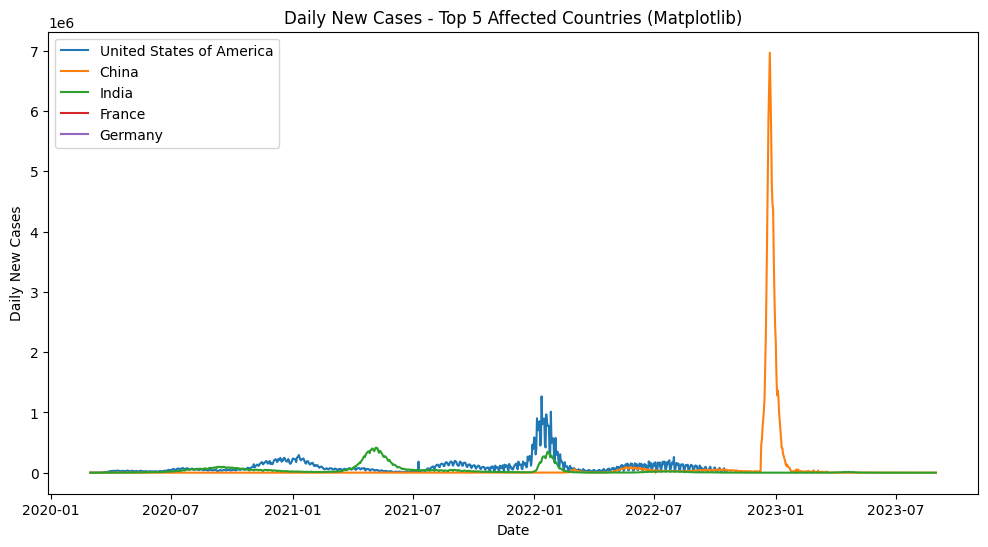

In [ ]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



## Question:
What we should have done instade to plot the top 5 countries least affected by COVID-19?

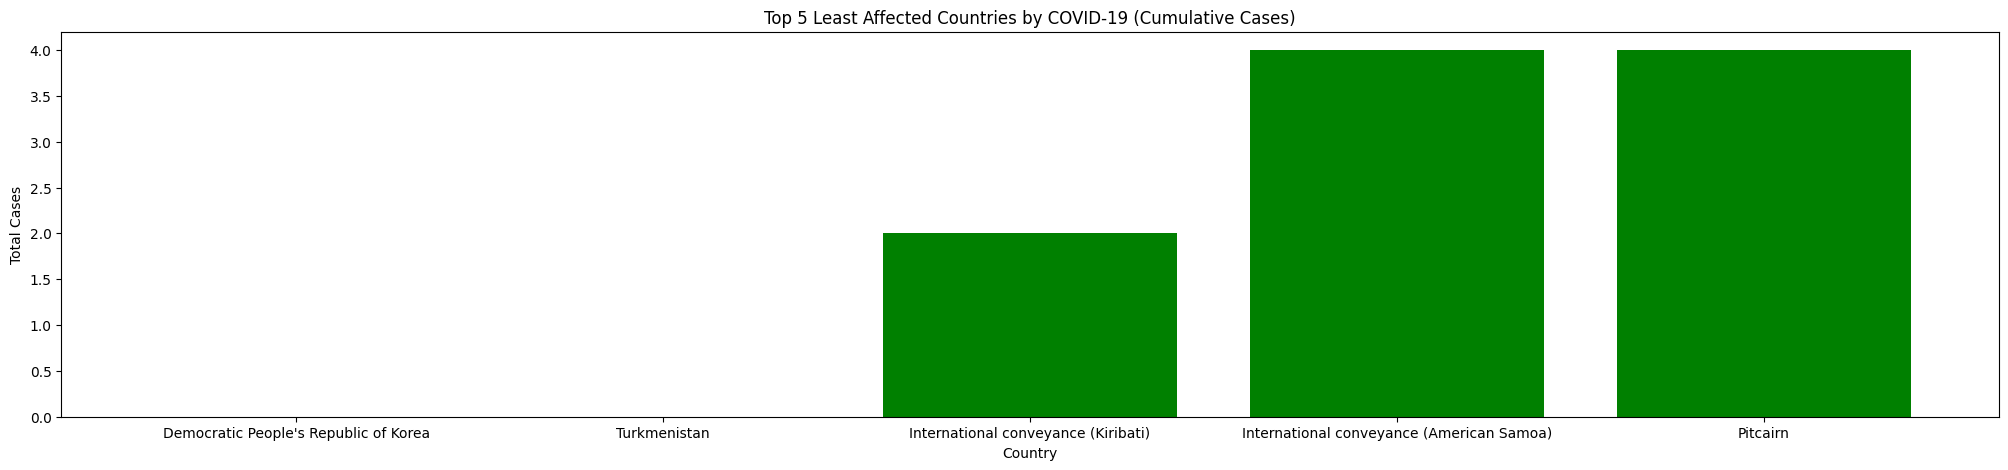

In [ ]:
"""what we should have done is:

Aggregate the data per country (take the maximum cumulative cases/deaths for each country).

Rank countries by total cases (or deaths).

Pick the 5 with the lowest totals.

Plot them in a chart."""

df_covid['New_cases'] = df_covid['New_cases'].fillna(0)
df_covid['New_deaths'] = df_covid['New_deaths'].fillna(0)

# Get the max cumulative cases per country
country_cases = df_covid.groupby("Country")["Cumulative_cases"].max().reset_index()

# Sort by least affected
least_affected = country_cases.sort_values(by="Cumulative_cases").head(5)

# Plot
plt.figure(figsize=(25,5))
plt.bar(least_affected["Country"], least_affected["Cumulative_cases"], color="green")
plt.title("Top 5 Least Affected Countries by COVID-19 (Cumulative Cases)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.show()

# we can plot top 5 most affected countries by COVID-19 too

### Task

Create a line plot which shows daily global new cases as one dramatic mountain shape

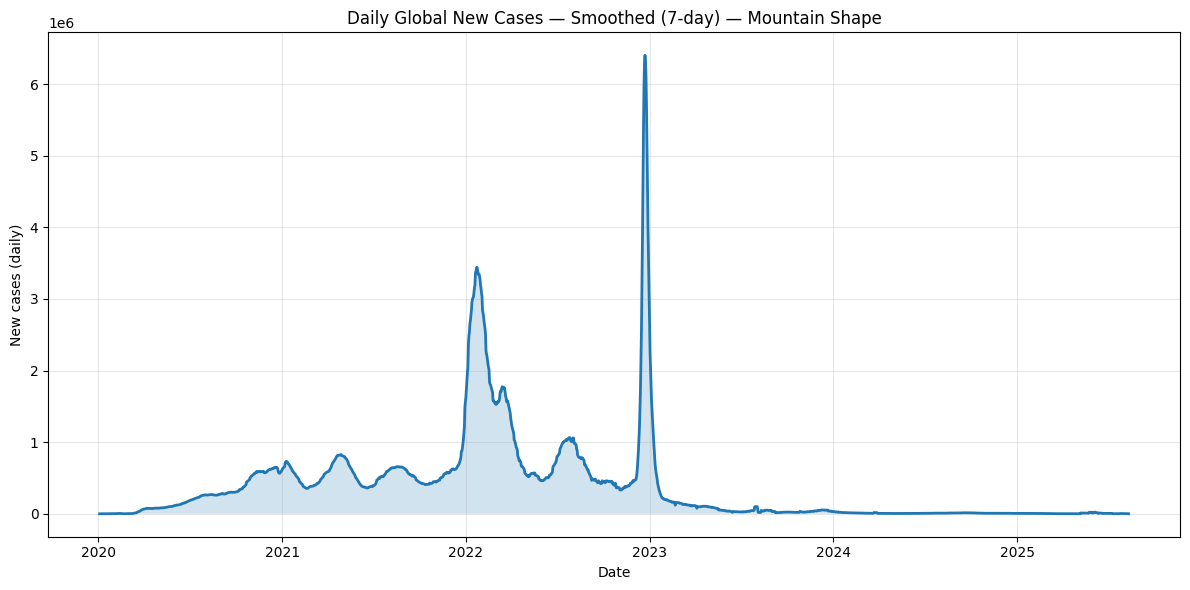

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Preprocess
df_covid['Date_reported'] = pd.to_datetime(df_covid['Date_reported'])
df_covid['New_cases'] = df_covid['New_cases'].fillna(0).astype(float)

# 2. Aggregate global daily new cases
global_daily = df_covid.groupby('Date_reported', as_index=True)['New_cases'].sum().sort_index()

# 3. Smooth (7-day rolling mean -> adjust window if you want smoother or sharper)
global_smoothed = global_daily.rolling(window=7, center=True, min_periods=1).mean()

# 4. Plot (single matplotlib plot)
fig, ax = plt.subplots(figsize=(12,6))
x_numeric = mdates.date2num(global_smoothed.index.to_numpy())
y = global_smoothed.to_numpy(dtype=float)

ax.plot(x_numeric, y, linewidth=2)            # line
ax.fill_between(x_numeric, y, alpha=0.2)      # filled area under curve
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_title("Daily Global New Cases — Smoothed (7-day) — Mountain Shape")
ax.set_xlabel("Date")
ax.set_ylabel("New cases (daily)")
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()




---

### Plot 2

This code aggregates COVID-19 new cases and deaths by quarter and visualizes them using a stacked bar chart, where deaths are shown on top of cases. It highlights the timeline of the pandemic’s impact, making it easier to compare peaks and proportions across different periods.

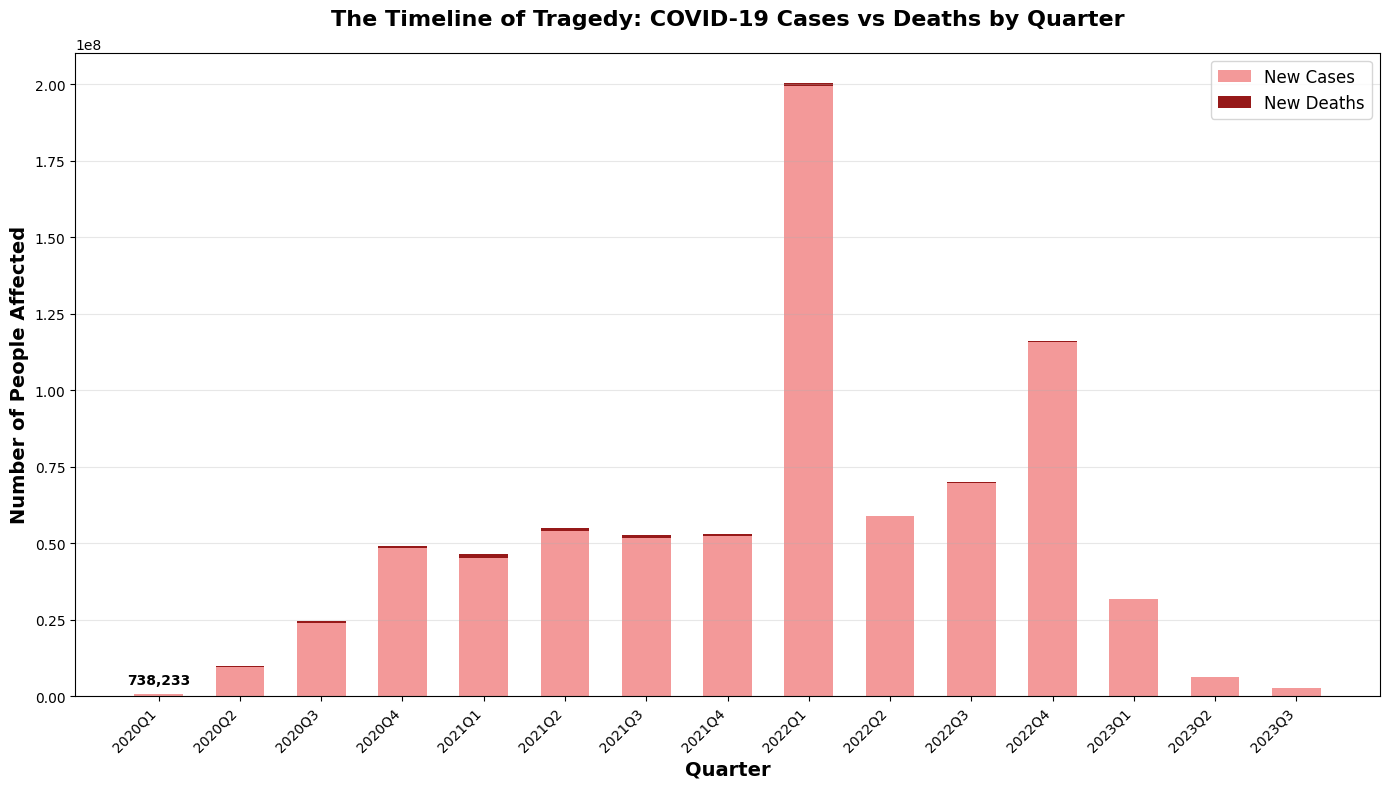

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Cases vs Deaths Over Time (Quarterly)

# Show the relationship between cases and deaths over time periods

# Create quarterly data for cleaner visualization
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
width = 0.6
cases_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_cases'],
                       width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_deaths'],
                        width, bottom=quarterly_data['New_cases'],
                        label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value annotations on the bars
for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
  # Annotate total at the top
  total = cases + deaths
  ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

  plt.tight_layout()
  plt.show()

  # Print insights
  max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
  max_cases = quarterly_data['New_cases'].max()



**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



### Task

Convert the above chart to double bar chart with the same data

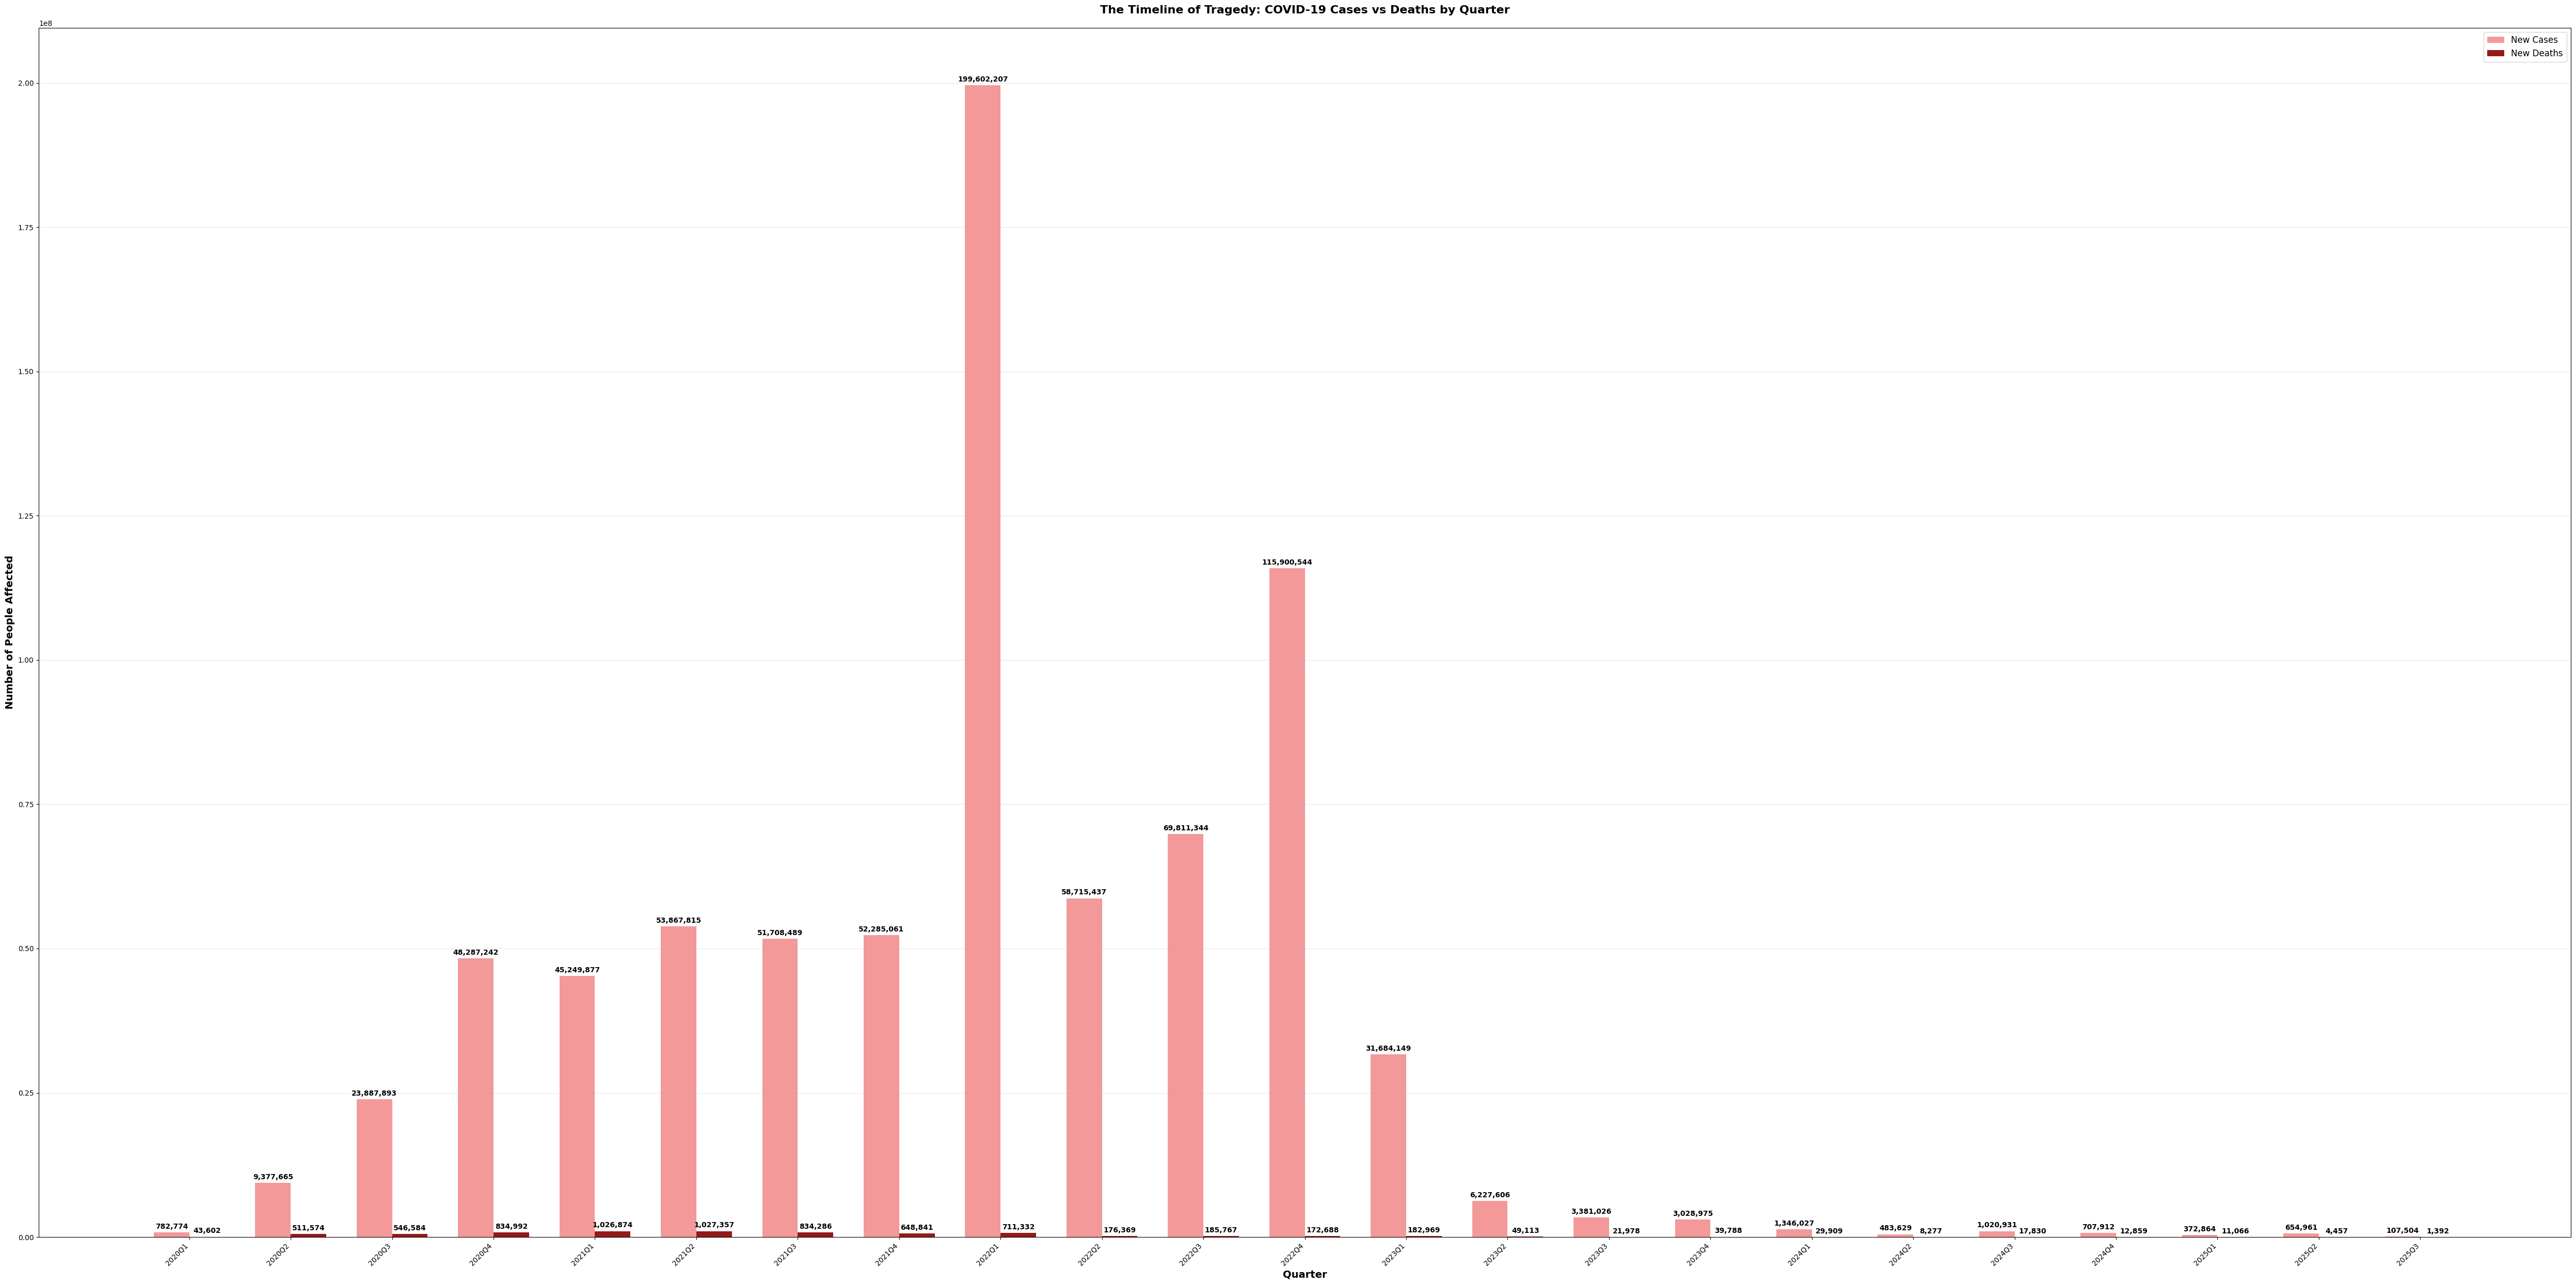

In [ ]:
# Cases vs Deaths Over Time (Quarterly) - Double Bar Chart


df_copy = df_covid.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the double bar chart
fig, ax = plt.subplots(figsize=(50, 25))

width = 0.35  # narrower bars for side-by-side
x = np.arange(len(quarterly_data))

cases_bars = ax.bar(x - width/2, quarterly_data['New_cases'],
                    width, label='New Cases', color='lightcoral', alpha=0.8)

deaths_bars = ax.bar(x + width/2, quarterly_data['New_deaths'],
                     width, label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title("The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter",
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add value annotations on the bars
for bar in cases_bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in deaths_bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Task

Construct a pie chart which Shows just top 10 countries mostly affected by COVID-19 ( by cummulative deaths)

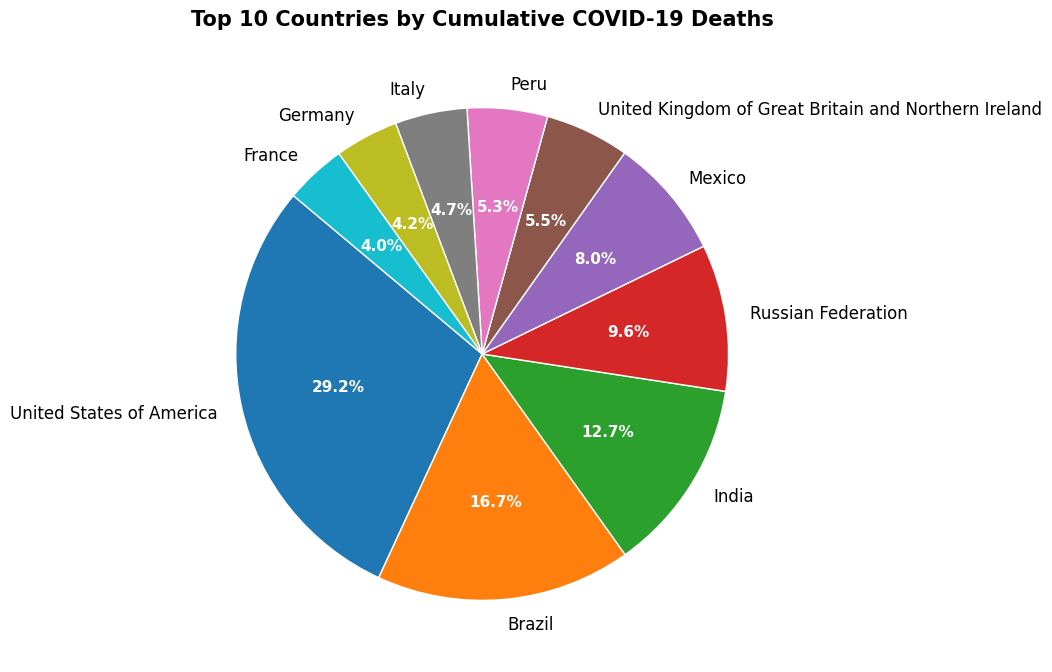

In [ ]:
# --- Work on a copy of your dataset ---
df = df_covid.copy()

# Ensure correct columns
country_col = 'Country'
deaths_col = 'Cumulative_deaths'

# Convert to numeric just in case
df[deaths_col] = pd.to_numeric(df[deaths_col], errors='coerce').fillna(0)

# Get the maximum cumulative deaths per country
country_deaths = (
    df.groupby(country_col)[deaths_col]
      .max()   # last or max cumulative deaths for each country
      .sort_values(ascending=False)
)

# Select top 10
top10 = country_deaths.head(10)

# --- Plot pie chart ---
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    top10,
    labels=top10.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors,  # nice 10-color palette
    wedgeprops={'edgecolor': 'white'}
)

# Style labels
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(texts, size=12)

ax.set_title("Top 10 Countries by Cumulative COVID-19 Deaths",
             fontsize=15, fontweight="bold", pad=15)

plt.show()





---

### Plot 3

We aggregated monthly COVID-19 new cases by WHO region and visualized them using a heatmap.
This highlights when and where case surges were most intense across different regions.

/tmp/ipython-input-3601044939.py:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


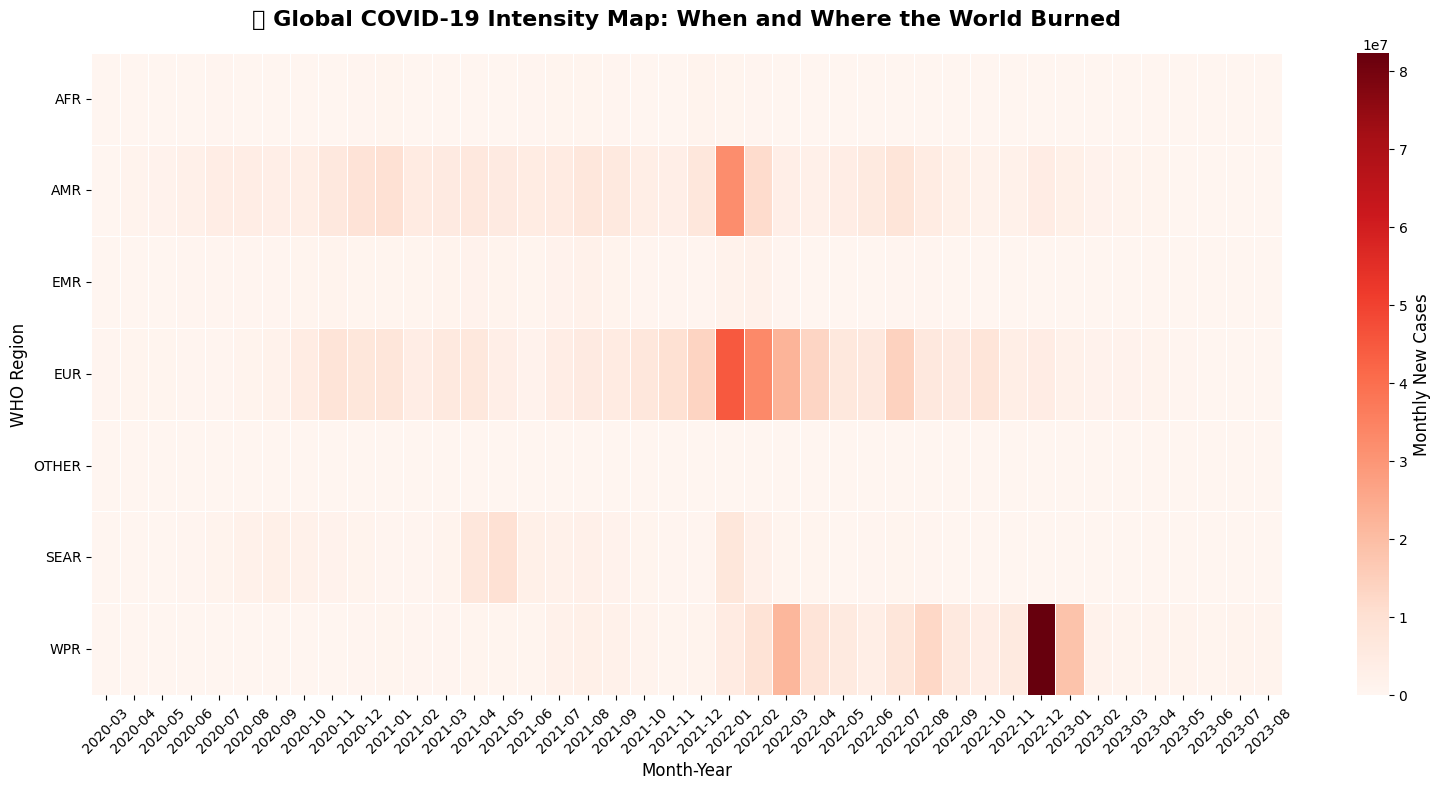

In [ ]:
#Create a powerful heatmap showing intensity across regions and time
# Create monthly data for cleaner visualization
df_monthly = df_covid_trimmed.copy()
df_monthly['Month_Year'] = df_monthly['Date_reported'].dt.to_period('M')

# Aggregate by WHO region and month
heatmap_data = df_monthly.groupby(['WHO_region', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='WHO_region', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global COVID-19 Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

### Task:

1) Visualize another heatmap showing quaterly new deaths' intensity by regions.
2) Visualize a heatmap showing monthly new cases' intensity by top 10 countries

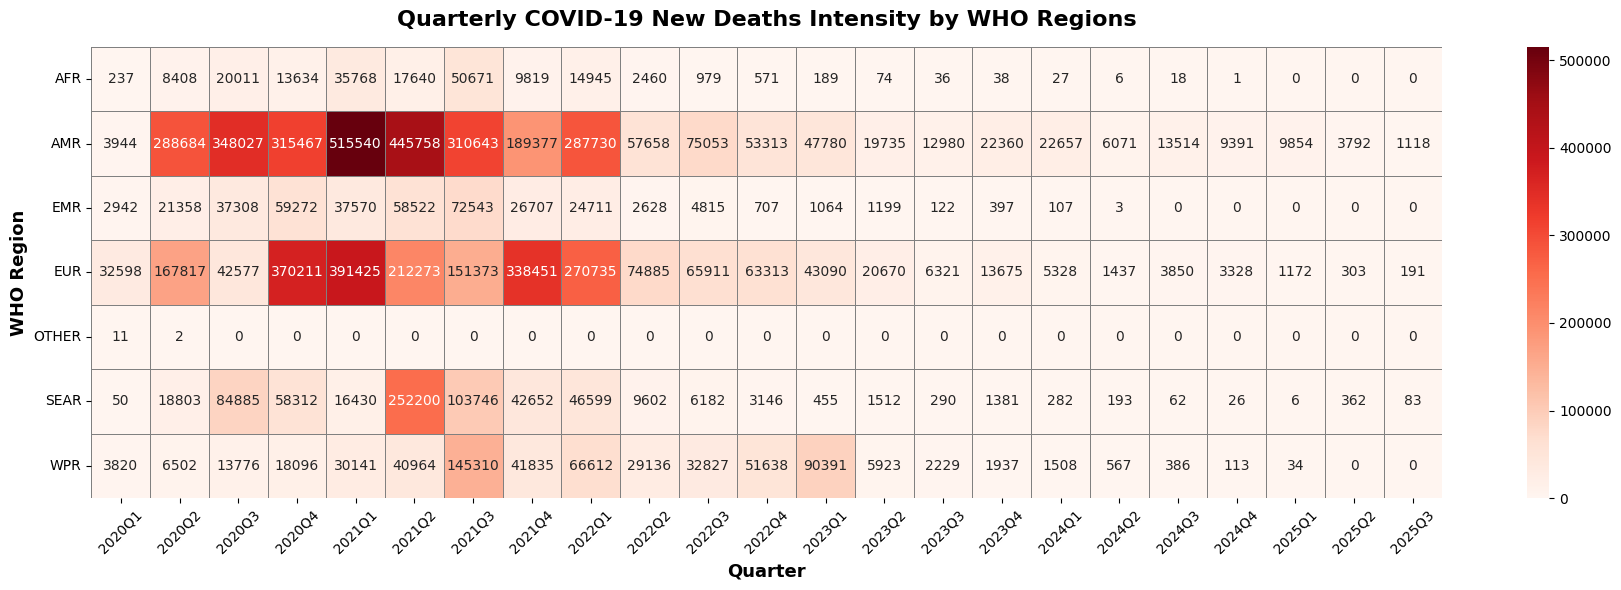

In [ ]:
df = df_covid.copy()

# Ensure proper column names
date_col = 'Date_reported'
region_col = 'WHO_region'
deaths_col = 'New_deaths'

# Convert data types
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df[deaths_col] = pd.to_numeric(df[deaths_col], errors='coerce').fillna(0)

# Create quarter column
df['Quarter'] = df[date_col].dt.to_period('Q').astype(str)

# Aggregate new deaths by region and quarter
quarterly_region = (
    df.groupby([region_col, 'Quarter'])[deaths_col]
      .sum()
      .reset_index()
)

# Pivot for heatmap
heatmap_data = quarterly_region.pivot(index=region_col, columns='Quarter', values=deaths_col)

# --- Plot heatmap ---
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor="gray", annot=True, fmt=".0f")

plt.title("Quarterly COVID-19 New Deaths Intensity by WHO Regions",
          fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Quarter", fontsize=13, fontweight="bold")
plt.ylabel("WHO Region", fontsize=13, fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


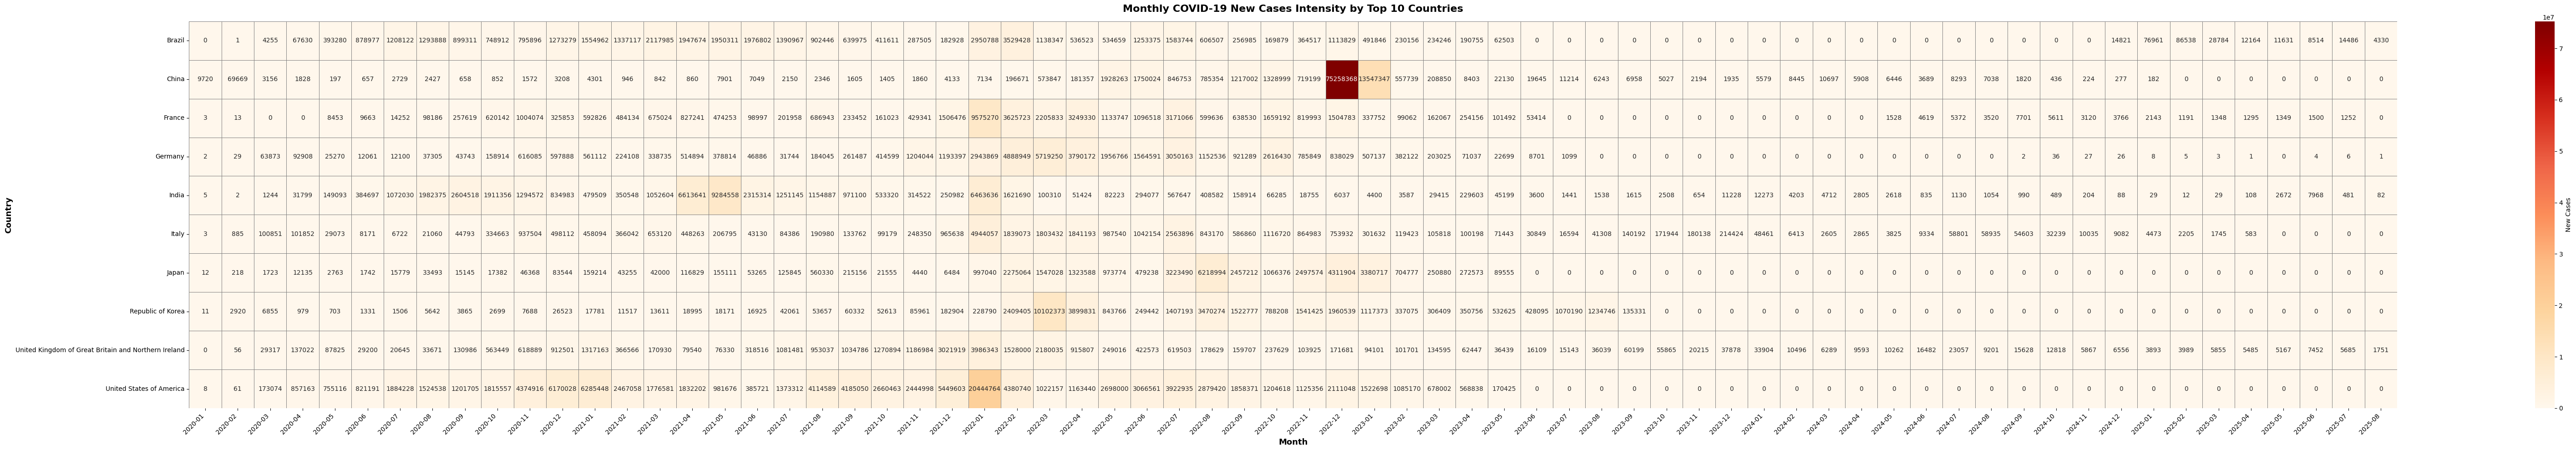

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# --- Work on a copy ---
df = df_covid.copy()

# Ensure proper columns
date_col = 'Date_reported'
cases_col = 'New_cases'
country_col = 'Country'

# Convert data types
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df[cases_col] = pd.to_numeric(df[cases_col], errors='coerce').fillna(0)

# --- 1) Find top 10 countries by total new cases ---
top10_countries = (
    df.groupby(country_col)[cases_col]
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# Filter only top 10
df_top10 = df[df[country_col].isin(top10_countries)]

# --- 2) Add "Year-Month" column ---
df_top10['Month'] = df_top10[date_col].dt.to_period('M').astype(str)

# --- 3) Aggregate monthly new cases per country ---
monthly_cases = (
    df_top10.groupby([country_col, 'Month'])[cases_col]
            .sum()
            .reset_index()
)

# --- 4) Pivot table for heatmap ---
heatmap_data = monthly_cases.pivot(index=country_col, columns='Month', values=cases_col)

# --- 5) Plot heatmap with annotations ---
plt.figure(figsize=(65, 10))
sns.heatmap(
    heatmap_data,
    cmap="OrRd",
    linewidths=0.5,
    linecolor="gray",
    annot=True,         # show numbers
    fmt=".0f",          # no decimals
    cbar_kws={'label': 'New Cases'}
)

plt.title("Monthly COVID-19 New Cases Intensity by Top 10 Countries",
          fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Month", fontsize=13, fontweight="bold")
plt.ylabel("Country", fontsize=13, fontweight="bold")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()




---



## Interactive COVID-19 Dashboard with Plotly

In this section, we build an interactive dashboard to explore the COVID-19 dataset using **Plotly**.  
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as  
- **Daily New Cases and Deaths** across regions and countries  
- **Cumulative trends** over time  
- **Stacked bar charts** and **line plots** for deeper insights  

This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,  
making the analysis more engaging and intuitive compared to static charts.


###  About Plotly

**Plotly** is a powerful, open-source Python library that allows us to create **interactive and publication-quality visualizations**—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to **zoom, hover, and explore data dynamically**, making data storytelling both engaging and intuitive.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_cases",
    title="Global New COVID-19 Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_deaths",
    title="Global New COVID-19 Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by WHO Region ----
region_grouped = df_covid_trimmed.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by WHO Region",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df_covid_trimmed.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total COVID-19 Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


## Question

Interpret the above map shown.

---



#**High-Burden Regions**
Countries shaded in bright yellow have reported the highest total number of COVID-19 cases, indicating widespread transmission and large-scale outbreaks:

United States: Among the most affected globally.

India: Significant case burden, especially during major waves.

Brazil, Russia, UK, France, Germany: Other major hotspots with sustained high case counts.

#**Lower-Burden Regions**
Countries in dark purple have reported fewer cumulative cases, which could be due to:

Smaller populations

Effective containment strategies

Limited testing/reporting infrastructure

Examples include:

Many African nations

Parts of Central Asia

Some Pacific island countries

The global distribution of COVID-19 cases reveals stark disparities in pandemic impact, shaped by population density, healthcare infrastructure, and policy response. High-burden regions like the US, India, and Brazil contrast sharply with lower-case countries, underscoring the need for contextual analysis beyond raw totals



---

#Assignment:

Find a similart dataset (e.g. `Ebola | 2014-2016 | Western Africa Ebola Outbreak` ) and extract a similar visualization out of it.





checkout:  `https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset`

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the Ebola dataset directly from **https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [3]:
df = pd.read_csv('ebola_2014_2016_clean.csv')

## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date**
- **Country**
- **Cumulative no. of confirmed, probable and suspected cases**
- **Cumulative no. of confirmed, probable and suspected deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [4]:
df.head()

,Country,Date,"Cumulative no. of confirmed, probable and suspected cases","Cumulative no. of confirmed, probable and suspected deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Nigeria,2014-08-29,19.0,7.0
2,Sierra Leone,2014-08-29,1026.0,422.0
3,Liberia,2014-08-29,1378.0,694.0
4,Sierra Leone,2014-09-05,1261.0,491.0


#**EDA Visualizations**

#**Histograms**

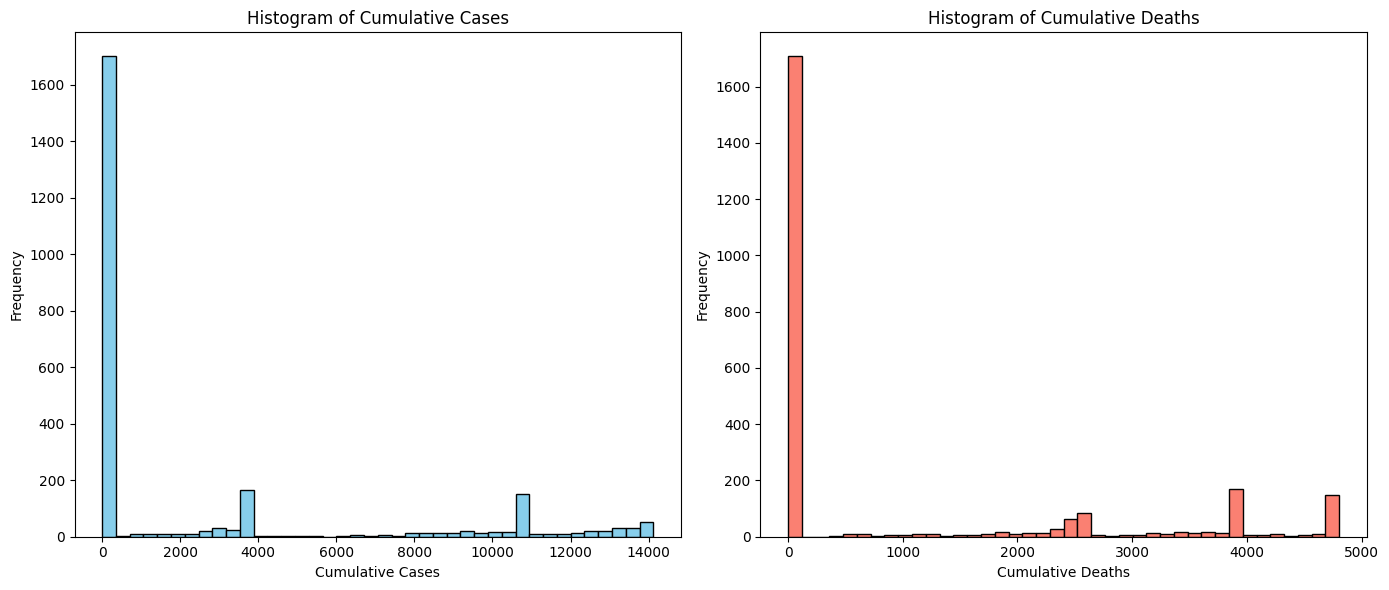

In [7]:



# Rename columns for easier handling
df = df.rename(columns={
    "Cumulative no. of confirmed, probable and suspected cases": "Cases",
    "Cumulative no. of confirmed, probable and suspected deaths": "Deaths"
})

# Plot histograms
plt.figure(figsize=(14, 6))

# Histogram for cases
plt.subplot(1, 2, 1)
plt.hist(df["Cases"].dropna(), bins=40, color="skyblue", edgecolor="black")
plt.title("Histogram of Cumulative Cases")
plt.xlabel("Cumulative Cases")
plt.ylabel("Frequency")

# Histogram for deaths
plt.subplot(1, 2, 2)
plt.hist(df["Deaths"].dropna(), bins=40, color="salmon", edgecolor="black")
plt.title("Histogram of Cumulative Deaths")
plt.xlabel("Cumulative Deaths")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#**Line Plots**

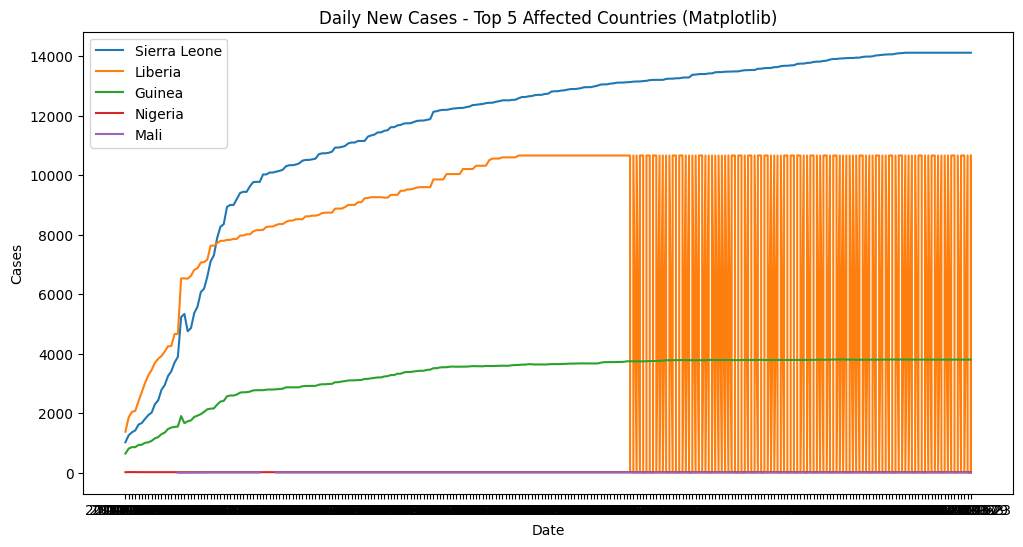

In [9]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df.groupby("Country")["Cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df[df["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date"], country_data["Cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


#**Bar Charts**

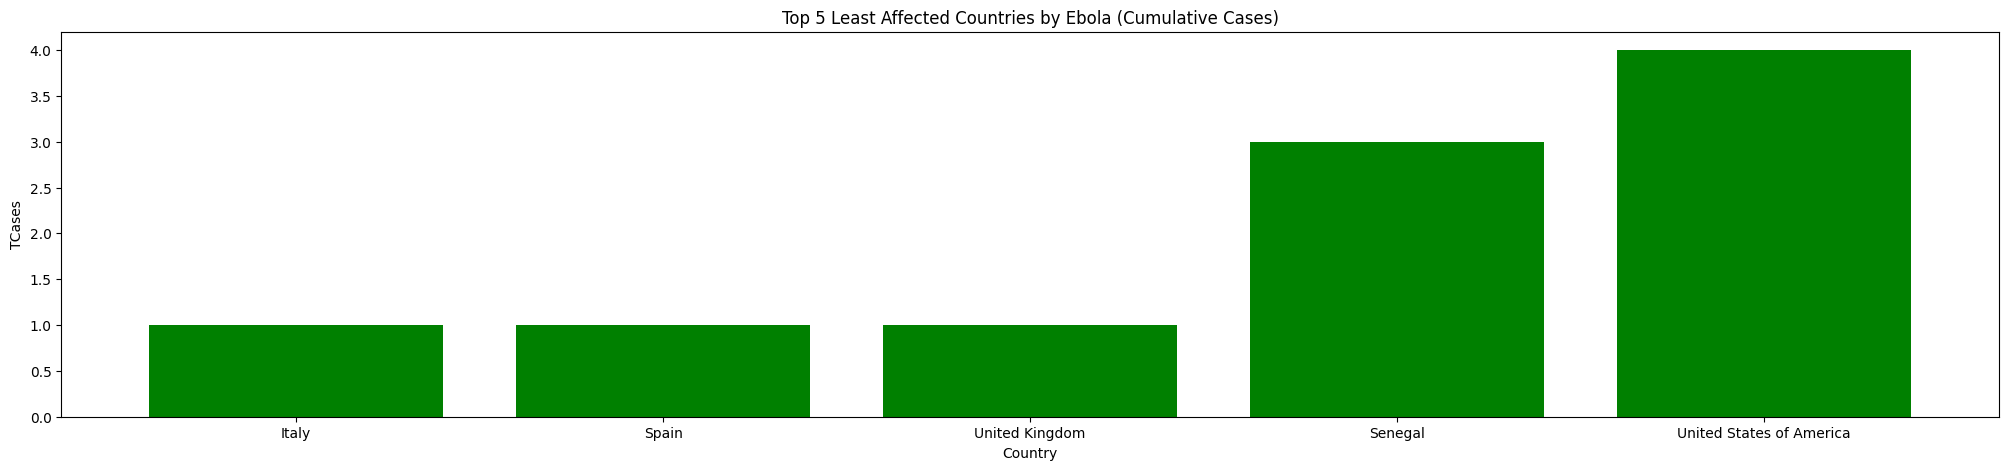

In [12]:
df['Cases'] = df['Cases'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)

# Get the max cumulative cases per country
country_cases = df.groupby("Country")["Cases"].max().reset_index()

# Sort by least affected
least_affected = country_cases.sort_values(by="Cases").head(5)

# Plot
plt.figure(figsize=(25,5))
plt.bar(least_affected["Country"], least_affected["Cases"], color="green")
plt.title("Top 5 Least Affected Countries by Ebola (Cumulative Cases)")
plt.xlabel("Country")
plt.ylabel("TCases")
plt.show()

#**Line Plots**

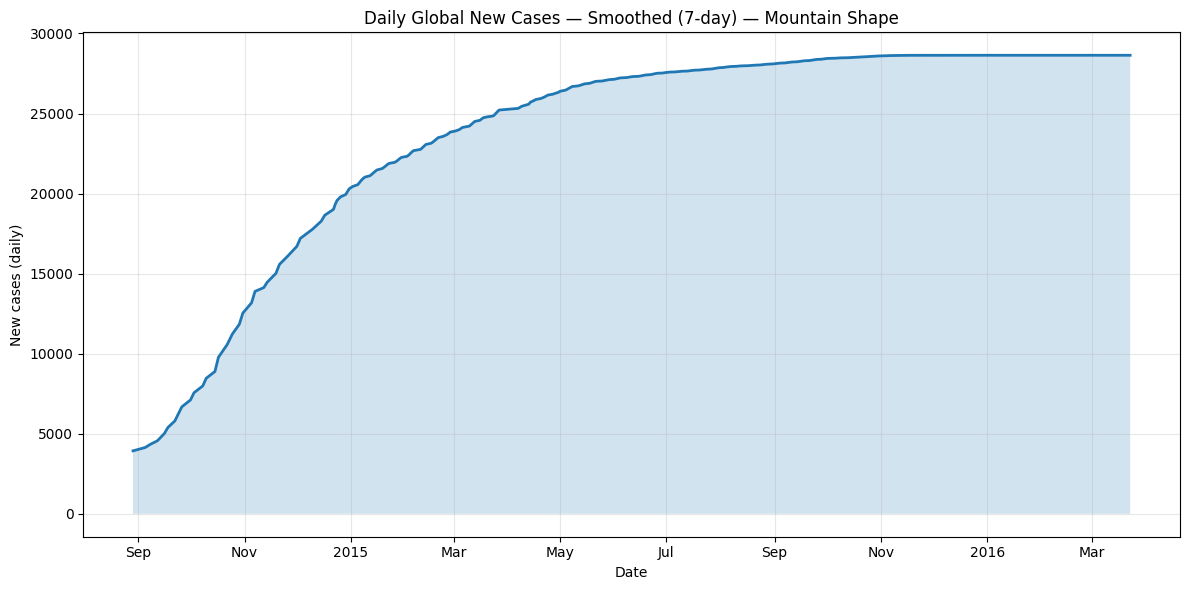

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Preprocess
df['Date'] = pd.to_datetime(df['Date'])
df['Cases'] = df['Cases'].fillna(0).astype(float)

# 2. Aggregate global daily new cases
global_daily = df.groupby('Date', as_index=True)['Cases'].sum().sort_index()

# 3. Smooth (7-day rolling mean -> adjust window if you want smoother or sharper)
global_smoothed = global_daily.rolling(window=7, center=True, min_periods=1).mean()

# 4. Plot (single matplotlib plot)
fig, ax = plt.subplots(figsize=(12,6))
x_numeric = mdates.date2num(global_smoothed.index.to_numpy())
y = global_smoothed.to_numpy(dtype=float)

ax.plot(x_numeric, y, linewidth=2)            # line
ax.fill_between(x_numeric, y, alpha=0.2)      # filled area under curve
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
ax.set_title("Daily Global New Cases — Smoothed (7-day) — Mountain Shape")
ax.set_xlabel("Date")
ax.set_ylabel("New cases (daily)")
ax.grid(alpha=0.3)
fig.tight_layout()
plt.show()


#**Stacked Bar Chart**

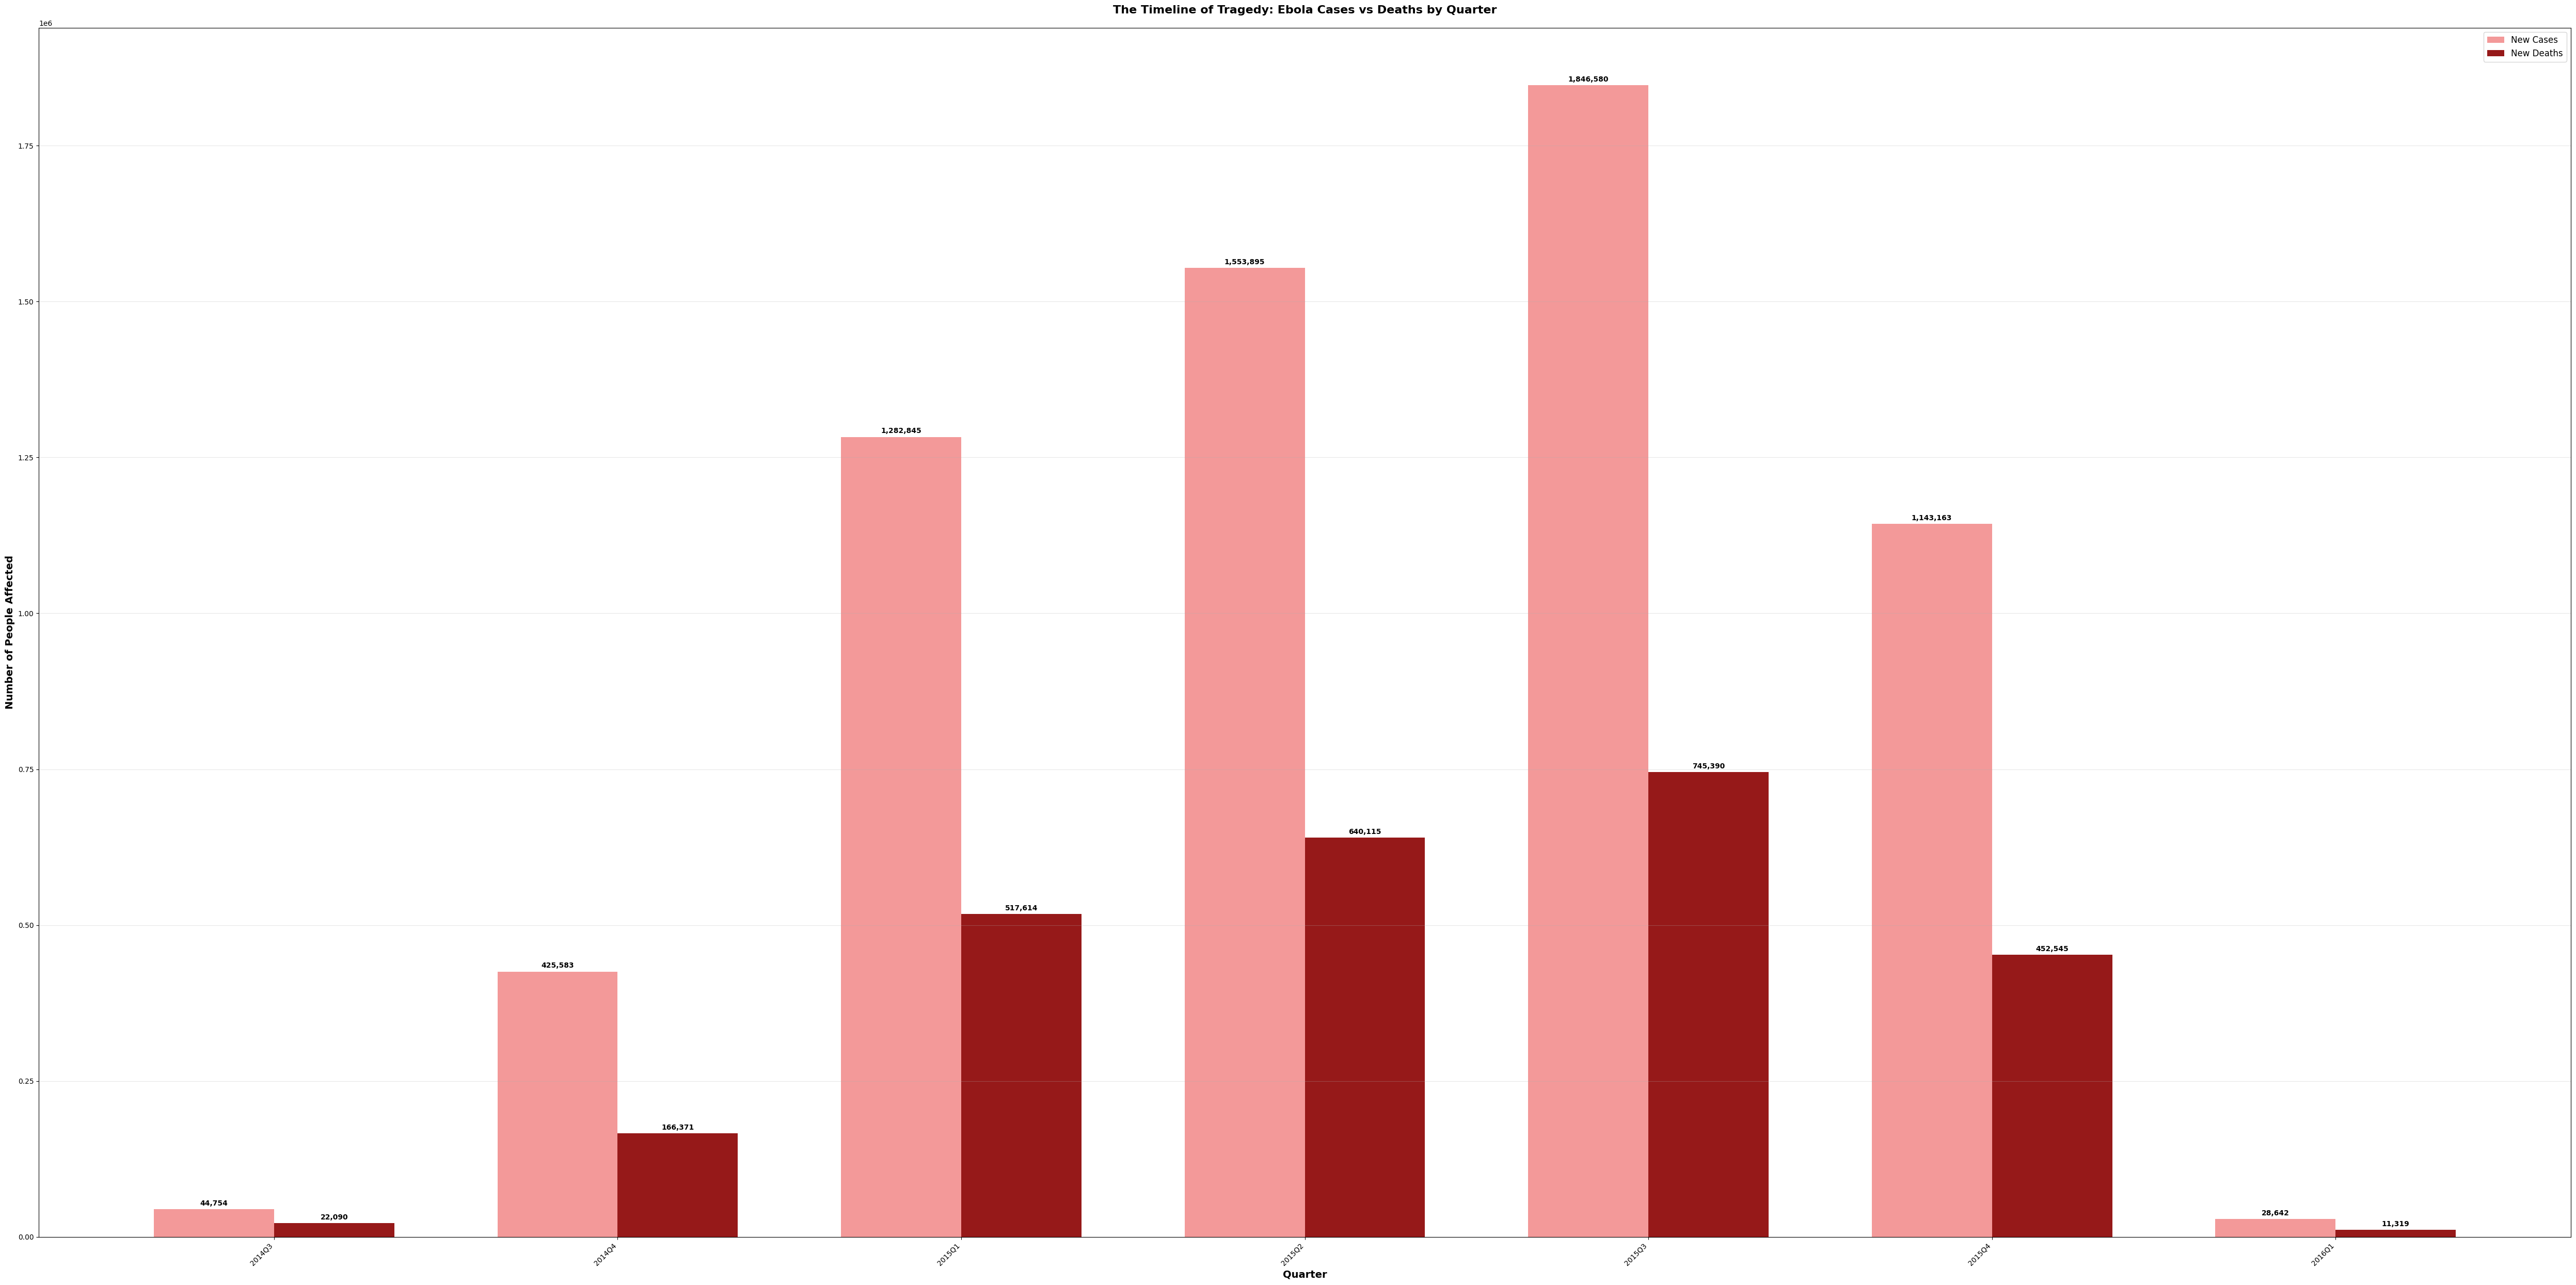

In [29]:
# Cases vs Deaths Over Time (Quarterly) - Double Bar Chart


df_copy = df.copy()
df_copy['Quarter'] = df_copy['Date'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({
    'Cases': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the double bar chart
fig, ax = plt.subplots(figsize=(50, 25))

width = 0.35  # narrower bars for side-by-side
x = np.arange(len(quarterly_data))

cases_bars = ax.bar(x - width/2, quarterly_data['Cases'],
                    width, label='New Cases', color='lightcoral', alpha=0.8)

deaths_bars = ax.bar(x + width/2, quarterly_data['Deaths'],
                     width, label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title("The Timeline of Tragedy: Ebola Cases vs Deaths by Quarter",
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Add value annotations on the bars
for bar in cases_bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in deaths_bars:
    height = bar.get_height()
    ax.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


#**Pie Charts**

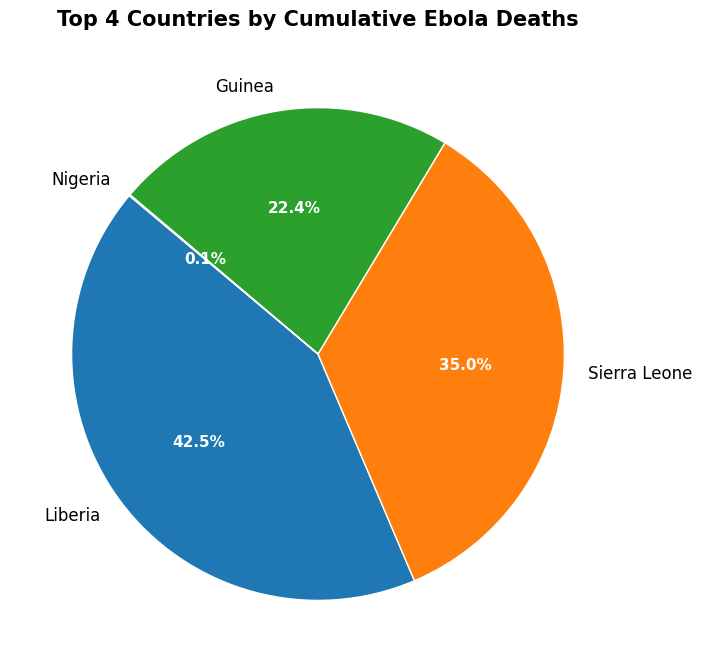

In [24]:
df = df.copy()

# Ensure correct columns
country_col = 'Country'
deaths_col = 'Deaths'

# Convert to numeric just in case
df[deaths_col] = pd.to_numeric(df[deaths_col], errors='coerce').fillna(0)

# Get the maximum cumulative deaths per country
country_deaths = (
    df.groupby(country_col)[deaths_col]
      .max()   # last or max cumulative deaths for each country
      .sort_values(ascending=False)
)

# Select top 4
top4 = country_deaths.head(4)

# --- Plot pie chart ---
fig, ax = plt.subplots(figsize=(15, 8))
wedges, texts, autotexts = ax.pie(
    top4,
    labels=top4.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors,  # nice 10-color palette
    wedgeprops={'edgecolor': 'white'}
)

# Style labels
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(texts, size=12)

ax.set_title("Top 4 Countries by Cumulative Ebola Deaths",
             fontsize=15, fontweight="bold", pad=15)

plt.show()



#**Heatmaps**

#Plot 1

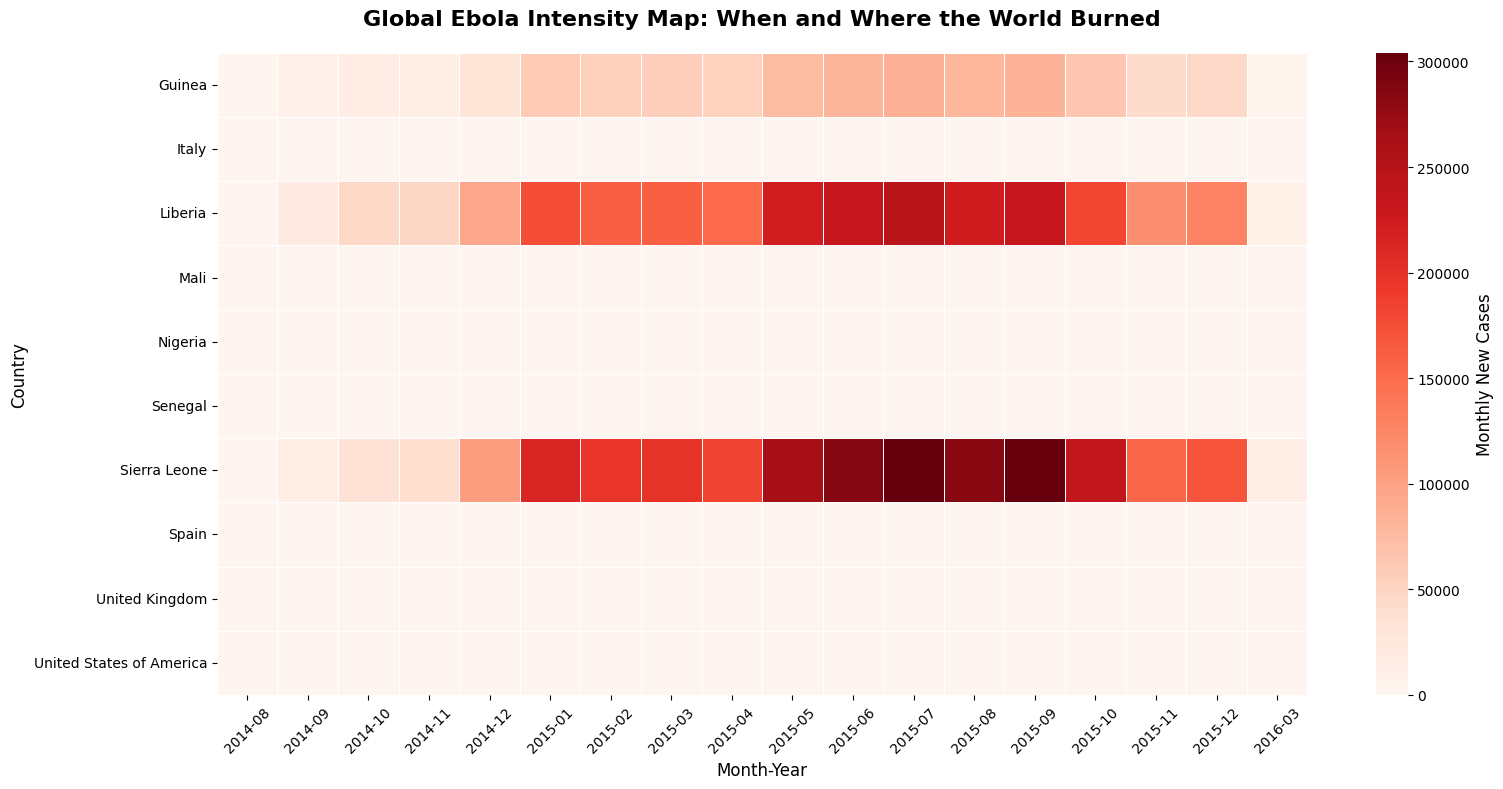

In [25]:
#Create a powerful heatmap showing intensity across regions and time
# Create monthly data for cleaner visualization
df_monthly = df.copy()
df_monthly['Month_Year'] = df_monthly['Date'].dt.to_period('M')

# Aggregate by Country and month
heatmap_data = df_monthly.groupby(['Country', 'Month_Year'])['Cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Country', columns='Month_Year', values='Cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global Ebola Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

#Plot 2

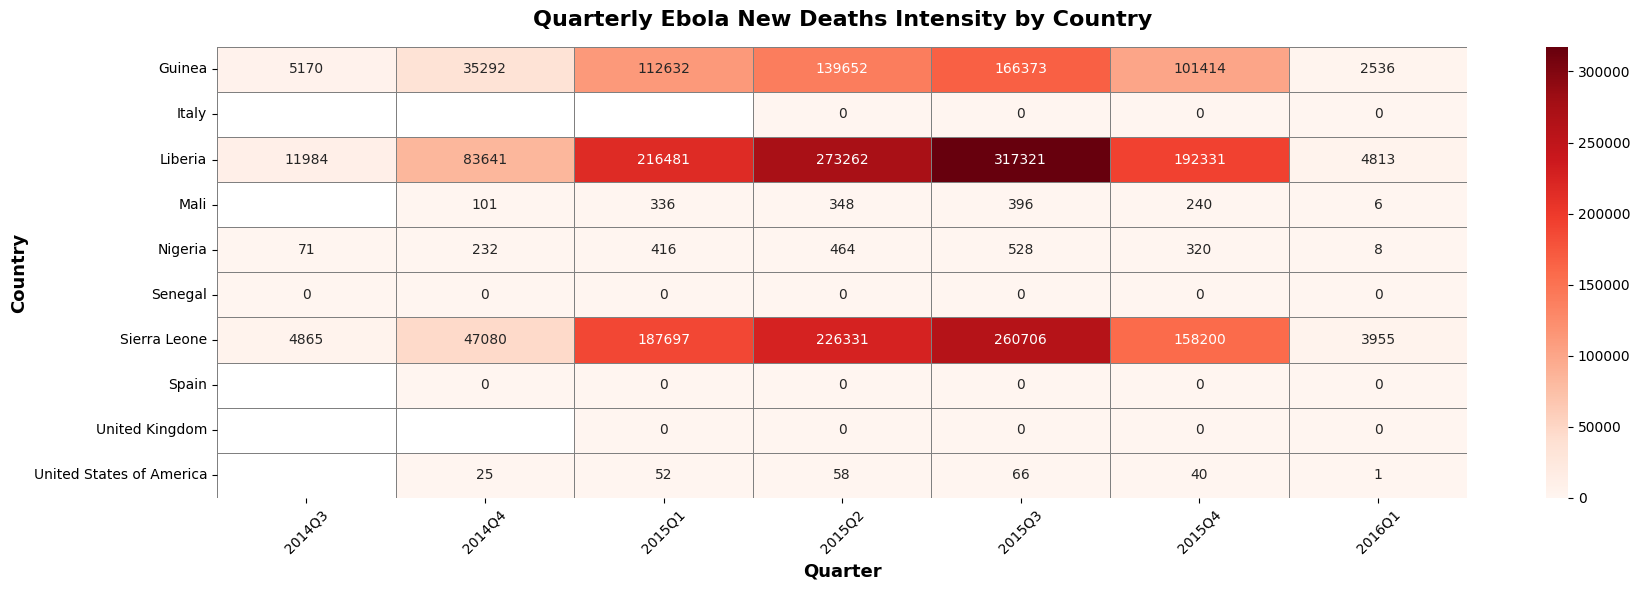

In [27]:
df = df.copy()

# Ensure proper column names
date_col = 'Date'
region_col = 'Country'
deaths_col = 'Deaths'

# Convert data types
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df[deaths_col] = pd.to_numeric(df[deaths_col], errors='coerce').fillna(0)

# Create quarter column
df['Quarter'] = df[date_col].dt.to_period('Q').astype(str)

# Aggregate new deaths by region and quarter
quarterly_region = (
    df.groupby([region_col, 'Quarter'])[deaths_col]
      .sum()
      .reset_index()
)

# Pivot for heatmap
heatmap_data = quarterly_region.pivot(index=region_col, columns='Quarter', values=deaths_col)

# --- Plot heatmap ---
plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor="gray", annot=True, fmt=".0f")

plt.title("Quarterly Ebola New Deaths Intensity by Country",
          fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Quarter", fontsize=13, fontweight="bold")
plt.ylabel("Country", fontsize=13, fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


#Plot 3

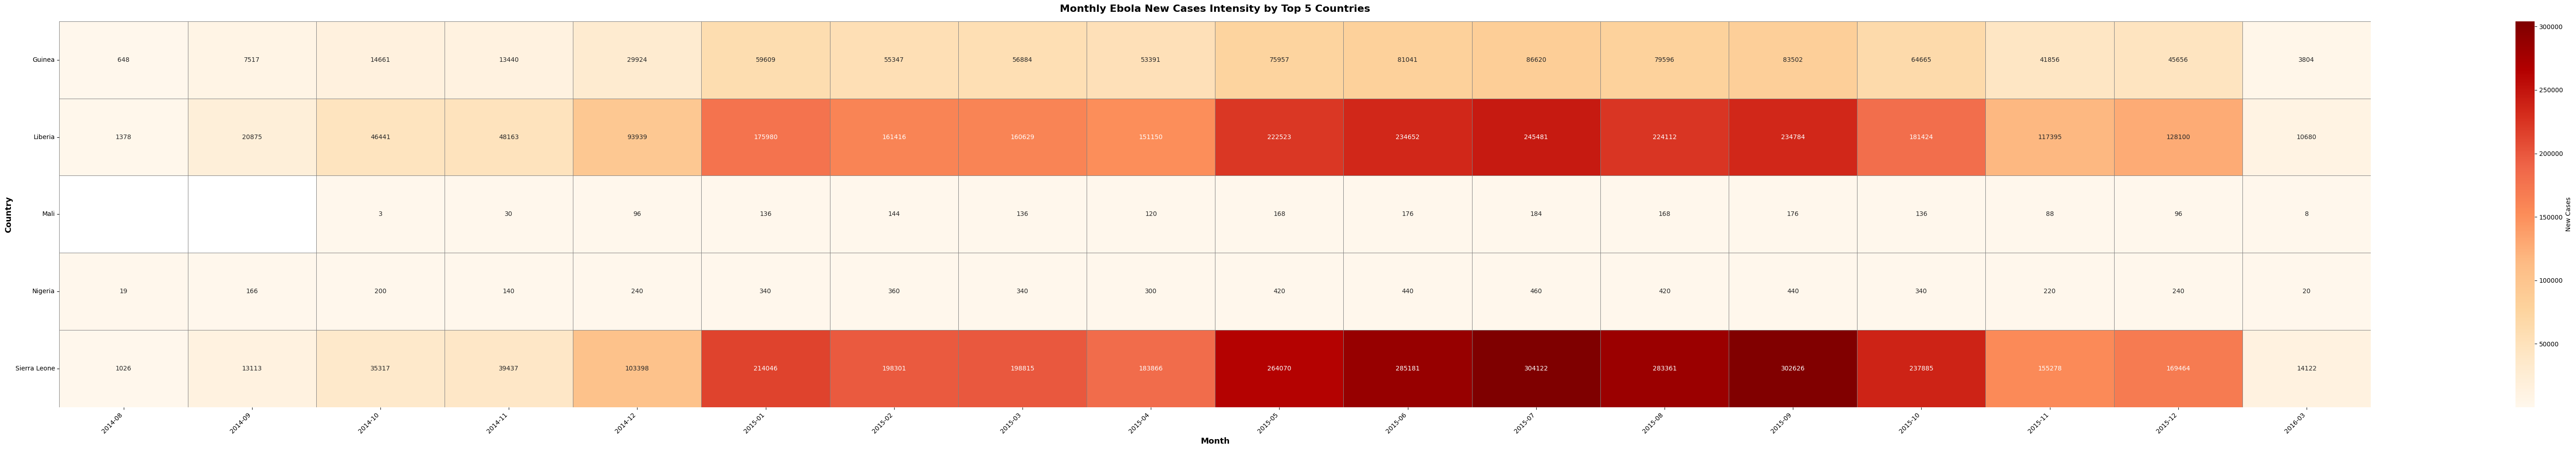

In [28]:
import warnings
warnings.filterwarnings('ignore')

# --- Work on a copy ---
df = df.copy()

# Ensure proper columns
date_col = 'Date'
cases_col = 'Cases'
country_col = 'Country'

# Convert data types
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df[cases_col] = pd.to_numeric(df[cases_col], errors='coerce').fillna(0)

# --- 1) Find top 5 countries by total new cases ---
top5_countries = (
    df.groupby(country_col)[cases_col]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

# Filter only top 5
df_top5 = df[df[country_col].isin(top5_countries)]

# --- 2) Add "Year-Month" column ---
df_top5['Month'] = df_top5[date_col].dt.to_period('M').astype(str)

# --- 3) Aggregate monthly new cases per country ---
monthly_cases = (
    df_top5.groupby([country_col, 'Month'])[cases_col]
            .sum()
            .reset_index()
)

# --- 4) Pivot table for heatmap ---
heatmap_data = monthly_cases.pivot(index=country_col, columns='Month', values=cases_col)

# --- 5) Plot heatmap with annotations ---
plt.figure(figsize=(65, 10))
sns.heatmap(
    heatmap_data,
    cmap="OrRd",
    linewidths=0.5,
    linecolor="gray",
    annot=True,         # show numbers
    fmt=".0f",          # no decimals
    cbar_kws={'label': 'New Cases'}
)

plt.title("Monthly Ebola New Cases Intensity by Top 5 Countries",
          fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Month", fontsize=13, fontweight="bold")
plt.ylabel("Country", fontsize=13, fontweight="bold")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


## Interactive Ebola Dashboard with Plotly

In this section, we build an interactive dashboard to explore the COVID-19 dataset using **Plotly**.  
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as  
- **Daily New Cases and Deaths** across regions and countries  
- **Cumulative trends** over time  
- **Stacked bar charts** and **line plots** for deeper insights  

This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,  
making the analysis more engaging and intuitive compared to static charts.


###  About Plotly

**Plotly** is a powerful, open-source Python library that allows us to create **interactive and publication-quality visualizations**—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to **zoom, hover, and explore data dynamically**, making data storytelling both engaging and intuitive.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df.groupby('Date', as_index=False).sum(),
    x="Date",
    y="Cumulative no. of confirmed, probable and suspected cases",
    title="Global New Ebola Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df.groupby('Date', as_index=False).sum(),
    x="Date",
    y="Cumulative no. of confirmed, probable and suspected deaths",
    title="Global New Ebola Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by Country----
region_grouped = df.groupby(['Date', 'Country'], as_index=False)[['Cumulative no. of confirmed, probable and suspected cases', 'Cumulative no. of confirmed, probable and suspected deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date"],
    y=region_grouped["Cumulative no. of confirmed, probable and suspected cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date"],
    y=region_grouped["Cumulative no. of confirmed, probable and suspected deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by Country",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df.groupby('Country', as_index=False)['Cumulative no. of confirmed, probable and suspected cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative no. of confirmed, probable and suspected cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total Ebola Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


#**The End**

# I have successfully completed the time series visualization of COVID-19 Dataset
# I have successfully visualized the whole Ebola Virus Dataset